In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('data3.csv')

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot: xlabel='benign_0__mal_1', ylabel='count'>

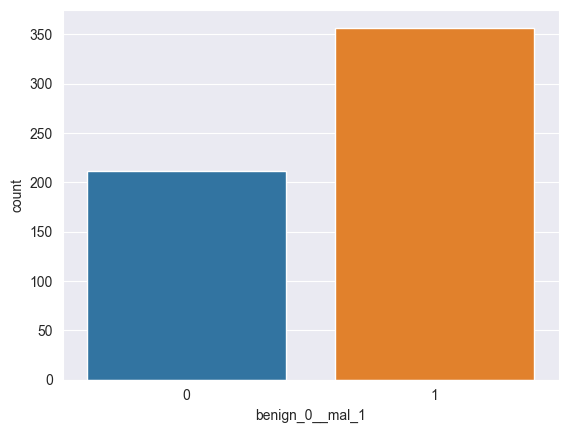

In [6]:
sns.countplot(x='benign_0__mal_1', data=df)

<AxesSubplot: >

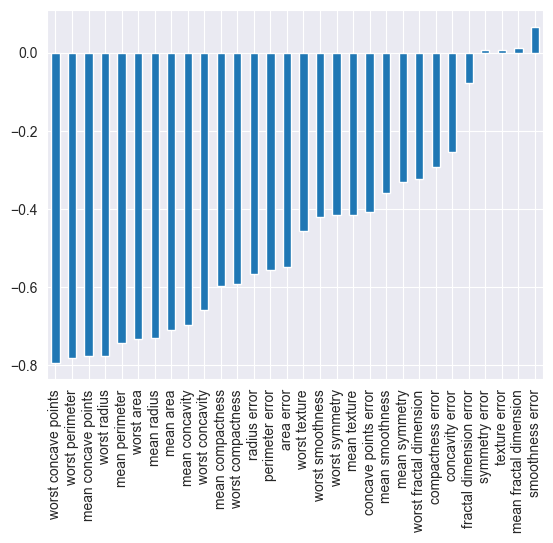

In [8]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot: >

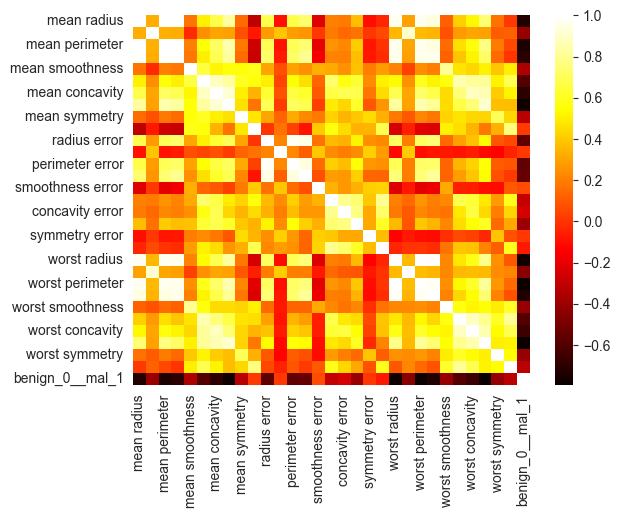

In [13]:
sns.heatmap(df.corr(), cmap='hot')

In [14]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [22]:
X_train.shape

(398, 30)

In [23]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [24]:
model.compile(loss='binary_crossentropy', optimizer='adam')

In [25]:
model.fit(x=X_train, y=y_train, epochs=3000, validation_data=(X_test, y_test))

Epoch 1/3000
13/13 [==============================] - 1s 21ms/step - loss: 0.6501 - val_loss: 0.6218
Epoch 2/3000
13/13 [==============================] - 0s 5ms/step - loss: 0.6107 - val_loss: 0.5880
Epoch 3/3000
13/13 [==============================] - 0s 6ms/step - loss: 0.5760 - val_loss: 0.5519
Epoch 4/3000
13/13 [==============================] - 0s 5ms/step - loss: 0.5367 - val_loss: 0.5077
Epoch 5/3000
13/13 [==============================] - 0s 5ms/step - loss: 0.4941 - val_loss: 0.4617
Epoch 6/3000
13/13 [==============================] - 0s 6ms/step - loss: 0.4484 - val_loss: 0.4175
Epoch 7/3000
13/13 [==============================] - 0s 5ms/step - loss: 0.4059 - val_loss: 0.3782
Epoch 8/3000
13/13 [==============================] - 0s 5ms/step - loss: 0.3647 - val_loss: 0.3385
Epoch 9/3000
13/13 [==============================] - 0s 5ms/step - loss: 0.3317 - val_loss: 0.3069
Epoch 10/3000
13/13 [==============================] - 0s 5ms/step - loss: 0.2950 - val_loss: 0.283

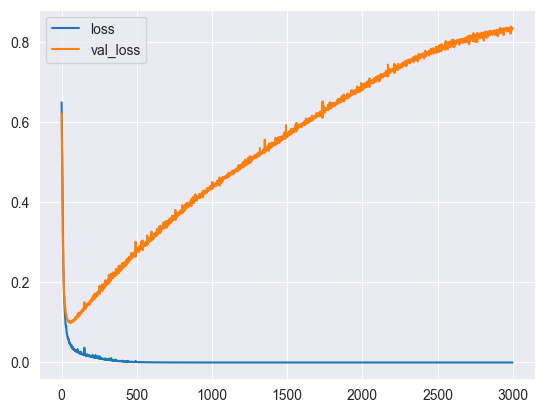

In [26]:
losses = pd.DataFrame(model.history.history).plot()

In [27]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [28]:
model.compile(loss='binary_crossentropy', optimizer='adam')

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [31]:
model.fit(x=X_train, y=y_train, epochs=3000, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/3000
13/13 [==============================] - 1s 14ms/step - loss: 0.6753 - val_loss: 0.6510
Epoch 2/3000
13/13 [==============================] - 0s 5ms/step - loss: 0.6396 - val_loss: 0.6160
Epoch 3/3000
13/13 [==============================] - 0s 5ms/step - loss: 0.6011 - val_loss: 0.5786
Epoch 4/3000
13/13 [==============================] - 0s 5ms/step - loss: 0.5604 - val_loss: 0.5410
Epoch 5/3000
13/13 [==============================] - 0s 5ms/step - loss: 0.5193 - val_loss: 0.4946
Epoch 6/3000
13/13 [==============================] - 0s 5ms/step - loss: 0.4753 - val_loss: 0.4533
Epoch 7/3000
13/13 [==============================] - 0s 4ms/step - loss: 0.4336 - val_loss: 0.4121
Epoch 8/3000
13/13 [==============================] - 0s 5ms/step - loss: 0.3932 - val_loss: 0.3758
Epoch 9/3000
13/13 [==============================] - 0s 6ms/step - loss: 0.3576 - val_loss: 0.3426
Epoch 10/3000
13/13 [==============================] - 0s 6ms/step - loss: 0.3268 - val_loss: 0.312

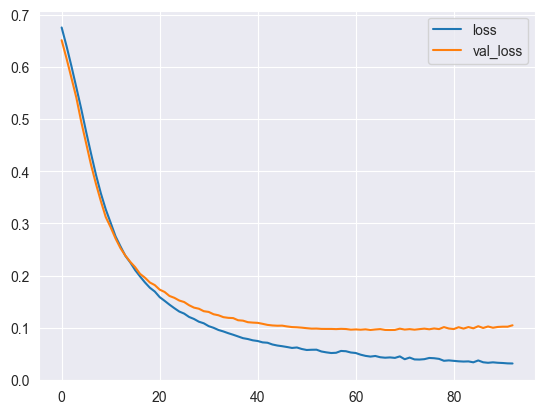

In [32]:
losses = pd.DataFrame(model.history.history).plot()

In [33]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [34]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

model.fit(x=X_train, y=y_train, epochs=3000, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/3000
13/13 [==============================] - 1s 15ms/step - loss: 0.7702 - val_loss: 0.6910
Epoch 2/3000
13/13 [==============================] - 0s 5ms/step - loss: 0.7074 - val_loss: 0.6726
Epoch 3/3000
13/13 [==============================] - 0s 5ms/step - loss: 0.6975 - val_loss: 0.6567
Epoch 4/3000
13/13 [==============================] - 0s 5ms/step - loss: 0.6688 - val_loss: 0.6394
Epoch 5/3000
13/13 [==============================] - 0s 5ms/step - loss: 0.6473 - val_loss: 0.6234
Epoch 6/3000
13/13 [==============================] - 0s 5ms/step - loss: 0.6268 - val_loss: 0.6043
Epoch 7/3000
13/13 [==============================] - 0s 5ms/step - loss: 0.5957 - val_loss: 0.5818
Epoch 8/3000
13/13 [==============================] - 0s 5ms/step - loss: 0.5839 - val_loss: 0.5530
Epoch 9/3000
13/13 [==============================] - 0s 5ms/step - loss: 0.5627 - val_loss: 0.5275
Epoch 10/3000
13/13 [==============================] - 0s 5ms/step - loss: 0.5551 - val_loss: 0.500

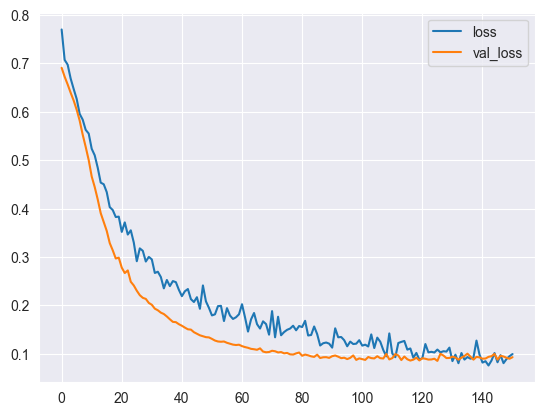

In [35]:
losses = pd.DataFrame(model.history.history).plot()

In [53]:
predicted = model.predict(X_test)
predicted = (lambda x: np.array([np.round(x_) for x_ in x]))(predicted)
predicted

6/6 [==============================] - 0s 2ms/step


array([[0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],

In [54]:
from sklearn.metrics import confusion_matrix, classification_report

In [55]:
print(classification_report(predicted, y_test))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96        69
         1.0       0.97      0.98      0.98       102

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [56]:
print(confusion_matrix(predicted, y_test))

[[ 66   3]
 [  2 100]]
